<a href="https://colab.research.google.com/github/CalvinK2025/EmployeeDataSet/blob/main/EmployeeDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3
import pandas as pd

# Calvin Kuo

# Connect to the database
conn = sqlite3.connect('employee.db')
cursor = conn.cursor()

# Drop Employee table if it exists
cursor.execute('''
DROP TABLE IF EXISTS Employee;
''')

# Create employee table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Employee (
      EmployeeID INT PRIMARY KEY NOT NULL,
      FirstName VARCHAR(50) NOT NULL,
      LastName VARCHAR(50) NOT NULL,
      Email VARCHAR(50) UNIQUE NOT NULL,
      PhoneNumber VARCHAR(15) UNIQUE NOT NULL,
      HireDate DATE NOT NULL,
      JobTitle VARCHAR(50),
      Department VARCHAR(50),
      Salary DECIMAL (10,2),
      ManagerID INT,
      FOREIGN KEY (ManagerID) REFERENCES Employee(EmployeeID)
    )
''')

# Insert sample data
employee_data = [
    (1, 'John', 'Doe', 'john.doe@example.com', '123-456-7890', '2023-03-15', 'Software Engineer', 'Technology', 75000.00, None),
    (2, 'Jane', 'Smith', 'jane.smith@example.com', '234-567-8901', '2022-07-10', 'Data Scientist', 'Technology', 80000.00, 1),
    (3, 'Michael', 'Johnson', 'michael.johnson@example.com', '345-678-9012', '2021-05-22', 'Product Manager', 'Technology', 95000.00, 2),
    (4, 'Emily', 'Davis', 'emily.davis@example.com', '456-789-0123', '2020-11-14', 'HR Specialist', 'Human Resources', 60000.00, None),
    (5, 'David', 'Brown', 'david.brown@example.com', '567-890-1234', '2019-09-05', 'UX Designer', 'Technology', 72000.00, 1),
    (6, 'Sarah', 'Wilson', 'sarah.wilson@example.com', '678-901-2345', '2021-01-30', 'Marketing Manager', 'Marketing', 85000.00, None),
    (7, 'Chris', 'Moore', 'chris.moore@example.com', '789-012-3456', '2022-12-12', 'HR Manager', 'Human Resources', 90000.00, 4),
    (8, 'Olivia', 'Taylor', 'olivia.taylor@example.com', '890-123-4567', '2018-06-07', 'Business Analyst', 'Finance', 70000.00, None),
    (9, 'James', 'Anderson', 'james.anderson@example.com', '901-234-5678', '2020-03-19', 'Network Engineer', 'Technology', 80000.00, 1),
    (10, 'Isabella', 'Thomas', 'isabella.thomas@example.com', '012-345-6789', '2022-08-30', 'Content Strategist', 'Marketing', 75000.00, 6)
]

# Insert data into the Employee table
cursor.executemany('INSERT OR REPLACE INTO Employee VALUES (?,?,?,?,?,?,?,?,?,?)',employee_data)
conn.commit()

# Fetch data from the table
cursor.execute('SELECT * FROM Employee')
data = cursor.fetchall()

# Create a pandas DataFrame
# Include all columns from the database table
employee_df = pd.DataFrame(data, columns=[
    'EmployeeId', 'FirstName', 'LastName', 'Email', 'PhoneNumber',
    'HireDate', 'JobTitle', 'Department', 'Salary', 'ManagerID'
])
# Close the database connection

# Display the DataFrame
print("\033[1mSELECT * FROM Employee\033[0m")
display(employee_df)

###############################################
cursor.execute('''
DROP TABLE IF EXISTS Tasks;
''')

# Create the Tasks table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Tasks (
        TaskID INT PRIMARY KEY NOT NULL,
        TaskType TEXT CHECK(TaskType IN ('Creative', 'Procedural', 'Decision-Making')) NOT NULL,
        TaskName TEXT NOT NULL,
        Description TEXT,
        DifficultyLevel INT CHECK(DifficultyLevel BETWEEN 1 AND 5),
        TimeToComplete INT NOT NULL,
        AutoPotential INT CHECK(AutoPotential BETWEEN 1 AND 5),
        AssignedEmployeeID INT,
        FOREIGN KEY (AssignedEmployeeID) REFERENCES Employee(EmployeeId)
    )
''')

# Sample data for the Tasks table
tasks_data = [
    (1, 'Creative', 'Design New Feature', 'Design and prototype a new feature for the product.', 3, 180, 2, 1),
    (2, 'Procedural', 'Data Cleaning', 'Clean and preprocess raw data for analysis.', 2, 120, 3, 2),
    (3, 'Decision-Making', 'Product Strategy Meeting', 'Attend a meeting to define the roadmap for the product.', 4, 90, 1, 3),
    (4, 'Procedural', 'Employee Onboarding', 'Assist in the onboarding of new employees.', 2, 150, 3, 4),
    (5, 'Creative', 'Develop New Software', 'Write and develop new software based on client needs.', 5, 240, 1, 1),
    (6, 'Creative', 'Design User Interface', 'Design the user interface for the new application.', 4, 200, 2, 5),
    (7, 'Procedural', 'System Maintenance', 'Perform routine maintenance on existing software systems.', 3, 180, 4, 9),
    (8, 'Creative', 'Content Strategy', 'Develop the content strategy for marketing campaigns.', 3, 150, 2, 6),
    (9, 'Decision-Making', 'HR Policy Review', 'Review and update HR policies to comply with new regulations.', 4, 120, 1, 4),
    (10, 'Procedural', 'Analyze Business Metrics', 'Analyze and report on key business metrics for decision-making.', 3, 180, 3, 2),
    (11, 'Procedural', 'Network Troubleshooting', 'Troubleshoot and resolve network issues.', 3, 120, 3, 9),
    (12, 'Creative', 'Design Sales Materials', 'Create and design materials for the sales team.', 3, 150, 2, 6),
    (13, 'Decision-Making', 'Budget Allocation', 'Participate in the decision-making process for budget allocation.', 5, 90, 1, 8),
    (14, 'Creative', 'Develop Marketing Campaign', 'Create a new marketing campaign for a product launch.', 4, 200, 2, 6),
    (15, 'Procedural', 'Write Technical Documentation', 'Document software features and usage for internal and external users.', 3, 180, 3, 1)
]

# Insert data into the Tasks table
cursor.executemany('INSERT OR REPLACE INTO Tasks VALUES (?,?,?,?,?,?,?,?)',tasks_data)
conn.commit()

# Fetch data from the table
cursor.execute('SELECT * FROM Tasks')
data = cursor.fetchall()

# Create a pandas DataFrame
# Include all columns from the database table
df = pd.DataFrame(data, columns=[
    'TaskID', 'TaskType', 'TaskName', 'Description',
    'DifficultyLevel', 'TimeToComplete', 'AutoPotential', 'AssignedEmployeeID'
])  # Changed column names to match the Tasks table

# Display the DataFrame
print('\n\n\n')

print("\033[1mSELECT * FROM Tasks\033[0m")
display(df)

################################################
cursor.execute('''
DROP TABLE IF EXISTS Messages;
''')
# Create the Messages Table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Messages(
        MessageID INT PRIMARY KEY NOT NULL,
        SenderID INT NOT NULL,
        ReceiverID INT NOT NULL,
        MessageText TEXT NOT NULL,
        SentDateTime DATETIME Default CURRENT_TIMESTAMP,
        FOREIGN KEY (SenderID) REFERENCES Employee(EmployeeID),
        FOREIGN KEY (ReceiverID) REFERENCES Employee(EmployeeID)
    )
''')

# Sample data for the Tasks table
messages_data = [

    (1, 1, 2, 'Hey Jane, can you help me with the data analysis tomorrow?', '2025-02-16 10:00:00'),
    (2, 2, 1, 'Sure, I can assist with that. Let me know the details.', '2025-02-16 10:05:00'),
    (3, 3, 4, 'Emily, we need to discuss the project roadmap for next week.', '2025-02-16 11:00:00'),
    (4, 4, 3, 'Got it, Michael. Let\'s schedule a meeting for Monday.', '2025-02-16 11:10:00'),
    (5, 5, 6, 'Sarah, do you have the design specs for the new software?', '2025-02-16 12:00:00'),
    (6, 6, 5, 'Yes, I\'ll send them over by the end of the day.', '2025-02-16 12:05:00'),
    (7, 7, 8, 'Olivia, can you review the marketing content for the campaign?', '2025-02-16 13:00:00'),
    (8, 8, 7, 'I\'ll go through it and get back to you shortly.', '2025-02-16 13:10:00'),
    (9, 9, 10, 'Isabella, I need your help with a financial report this week.', '2025-02-16 14:00:00'),
    (10, 10, 9, 'Sure, I\'ll get on it and send it to you by Thursday.', '2025-02-16 14:05:00'),
    (11, 11, 12, 'Ava, we have a system outage. Can you help with troubleshooting?', '2025-02-16 15:00:00'),
    (12, 12, 11, 'I\'m on it. Let\'s fix this ASAP.', '2025-02-16 15:10:00'),
    (13, 13, 14, 'Sophia, I need the budget allocation for the upcoming quarter.', '2025-02-16 16:00:00'),
    (14, 14, 13, 'I\'ll prepare the documents and send them to you by tomorrow.', '2025-02-16 16:05:00'),
    (15, 15, 1, 'Benjamin, can you design a new feature for our product?', '2025-02-16 17:00:00'),
    (16, 1, 15, 'Sure! I\'ll start working on it today.', '2025-02-16 17:05:00'),
    (17, 1, 3, 'Michael, do you have the product strategy document for the meeting?', '2025-02-16 18:00:00'),
    (18, 3, 1, 'Yes, I\'ll email it to you in a few minutes.', '2025-02-16 18:05:00'),
    (19, 5, 7, 'Chris, can you troubleshoot the software issue I\'m facing?', '2025-02-16 19:00:00'),
    (20, 7, 5, 'I\'ll check it out and get back to you.', '2025-02-16 19:05:00')

]

# Insert data into the Messages table
cursor.executemany('INSERT OR REPLACE INTO Messages VALUES (?,?,?,?,?)', messages_data)
conn.commit()

# Fetch data from the table
cursor.execute('SELECT * FROM Messages')
data = cursor.fetchall()

# Create a pandas DataFrame
# Include all columns from the database table
df = pd.DataFrame(data, columns=[
    'MessageID', 'SenderID', 'ReceiverID', 'MessageText', 'SentDateTime'
])

# Display the DataFrame
print('\n\n\n')

print("\033[1mSELECT * FROM Messages\033[0m")
display(df)

############################################
# Create the Hobby Table
cursor.execute('''
DROP TABLE IF EXISTS Hobby;
''')
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Hobby(
        HobbyID INT PRIMARY KEY,
        HobbyName VARCHAR(50) NOT NULL,
        Description TEXT
    )
''')

# Sample data for the Hobby table
hobby_data = [
    (1, 'Photography', 'Capturing moments and scenes with a camera to express creativity or document life.'),
    (2, 'Cooking', 'Preparing meals by combining ingredients and following recipes or creating new ones.'),
    (3, 'Reading', 'Engaging in the activity of reading books, articles, or other written material for enjoyment or learning.'),
    (4, 'Hiking', 'Walking long distances, usually on trails or in nature, for enjoyment or exercise.'),
    (5, 'Music', 'Playing instruments or listening to music to appreciate sound and rhythm.'),
    (6, 'Gardening', 'Cultivating plants and flowers for aesthetic or practical purposes.'),
    (7, 'Painting', 'Creating artwork using various techniques, such as oil, acrylic, or watercolor paints.')
]

# Insert data into the Hobby table
cursor.executemany('INSERT OR REPLACE INTO Hobby VALUES (?,?,?)', hobby_data)
conn.commit()

# Fetch data from the table
cursor.execute('SELECT * FROM Hobby')
data = cursor.fetchall()

# Create a pandas DataFrame
# Include all columns from the database table
df = pd.DataFrame(data, columns=[
    'HobbyID', 'HobbyName', 'Description'
])

# Display the DataFrame
print('\n\n\n')

print("\033[1mSELECT * FROM Hobby\033[0m")
display(df)

############################################
cursor.execute('''
DROP TABLE IF EXISTS Employee_hobby;
''')

# Create the Employee_hobby Table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Employee_hobby(
        EmployeeHobbyID INT PRIMARY KEY,
        EmployeeID INT NOT NULL,
        HobbyID INT NOT NULL,
        FOREIGN KEY (EmployeeID) REFERENCES Employee(EmployeeID),
        FOREIGN KEY (HobbyID) REFERENCES Hobby(HobbyID)
    )
''')

# Sample data for the Employee_hobby table
Employee_hobby_data = [
    (1, 1, 1),
    (2, 2, 3),
    (3, 3, 4),
    (4, 4, 5),
    (5, 5, 6),
    (6, 6, 7),
    (7, 7, 2),
    (8, 8, 3),
    (9, 9, 4),
    (10, 10, 1),
    (11, 11, 5),
    (12, 12, 6),
    (13, 13, 7),
    (14, 14, 2),
    (15, 15, 3)
]

# Insert data into the Employee_hobby_data table
cursor.executemany('INSERT OR REPLACE INTO Employee_hobby VALUES (?,?,?)', Employee_hobby_data)
conn.commit()

# Fetch data from the table
cursor.execute('SELECT * FROM Employee_hobby')
data = cursor.fetchall()

# Create a pandas DataFrame
# Include all columns from the database table
df = pd.DataFrame(data, columns=[
    'EmployeeHobbyID','EmployeeID','HobbyID'
])

# Display the DataFrame
print('\n\n\n')

print("\033[1mSELECT * FROM Employee_hobby\033[0m")
display(df)
# Close the database connection

conn.close()

SELECT * FROM Employee


,EmployeeId,FirstName,LastName,Email,PhoneNumber,HireDate,JobTitle,Department,Salary,ManagerID
0,1,John,Doe,john.doe@example.com,123-456-7890,2023-03-15,Software Engineer,Technology,75000,NaN
1,2,Jane,Smith,jane.smith@example.com,234-567-8901,2022-07-10,Data Scientist,Technology,80000,1.0
2,3,Michael,Johnson,michael.johnson@example.com,345-678-9012,2021-05-22,Product Manager,Technology,95000,2.0
3,4,Emily,Davis,emily.davis@example.com,456-789-0123,2020-11-14,HR Specialist,Human Resources,60000,NaN
4,5,David,Brown,david.brown@example.com,567-890-1234,2019-09-05,UX Designer,Technology,72000,1.0
5,6,Sarah,Wilson,sarah.wilson@example.com,678-901-2345,2021-01-30,Marketing Manager,Marketing,85000,NaN
6,7,Chris,Moore,chris.moore@example.com,789-012-3456,2022-12-12,HR Manager,Human Resources,90000,4.0
7,8,Olivia,Taylor,olivia.taylor@example.com,890-123-4567,2018-06-07,Business Analyst,Finance,70000,NaN
8,9,James,Anderson,james.anderson@example.com,901-234-5678,2020-03-19,Network Engineer,Technology,80000,1.0
9,10,Isabella,Thomas,isabella.thomas@example.com,012-345-6789,2022-08-30,Content Strategist,Marketing,75000,6.0






SELECT * FROM Tasks


,TaskID,TaskType,TaskName,Description,DifficultyLevel,TimeToComplete,AutoPotential,AssignedEmployeeID
0,1,Creative,Design New Feature,Design and prototype a new feature for the pro...,3,180,2,1
1,2,Procedural,Data Cleaning,Clean and preprocess raw data for analysis.,2,120,3,2
2,3,Decision-Making,Product Strategy Meeting,Attend a meeting to define the roadmap for the...,4,90,1,3
3,4,Procedural,Employee Onboarding,Assist in the onboarding of new employees.,2,150,3,4
4,5,Creative,Develop New Software,Write and develop new software based on client...,5,240,1,1
5,6,Creative,Design User Interface,Design the user interface for the new applicat...,4,200,2,5
6,7,Procedural,System Maintenance,Perform routine maintenance on existing softwa...,3,180,4,9
7,8,Creative,Content Strategy,Develop the content strategy for marketing cam...,3,150,2,6
8,9,Decision-Making,HR Policy Review,Review and update HR policies to comply with n...,4,120,1,4
9,10,Procedural,Analyze Business Metrics,Analyze and report on key business metrics for...,3,180,3,2






SELECT * FROM Messages


,MessageID,SenderID,ReceiverID,MessageText,SentDateTime
0,1,1,2,"Hey Jane, can you help me with the data analys...",2025-02-16 10:00:00
1,2,2,1,"Sure, I can assist with that. Let me know the ...",2025-02-16 10:05:00
2,3,3,4,"Emily, we need to discuss the project roadmap ...",2025-02-16 11:00:00
3,4,4,3,"Got it, Michael. Let's schedule a meeting for ...",2025-02-16 11:10:00
4,5,5,6,"Sarah, do you have the design specs for the ne...",2025-02-16 12:00:00
5,6,6,5,"Yes, I'll send them over by the end of the day.",2025-02-16 12:05:00
6,7,7,8,"Olivia, can you review the marketing content f...",2025-02-16 13:00:00
7,8,8,7,I'll go through it and get back to you shortly.,2025-02-16 13:10:00
8,9,9,10,"Isabella, I need your help with a financial re...",2025-02-16 14:00:00
9,10,10,9,"Sure, I'll get on it and send it to you by Thu...",2025-02-16 14:05:00






SELECT * FROM Hobby


,HobbyID,HobbyName,Description
0,1,Photography,Capturing moments and scenes with a camera to ...
1,2,Cooking,Preparing meals by combining ingredients and f...
2,3,Reading,"Engaging in the activity of reading books, art..."
3,4,Hiking,"Walking long distances, usually on trails or i..."
4,5,Music,Playing instruments or listening to music to a...
5,6,Gardening,Cultivating plants and flowers for aesthetic o...
6,7,Painting,"Creating artwork using various techniques, suc..."






SELECT * FROM Employee_hobby


,EmployeeHobbyID,EmployeeID,HobbyID
0,1,1,1
1,2,2,3
2,3,3,4
3,4,4,5
4,5,5,6
5,6,6,7
6,7,7,2
7,8,8,3
8,9,9,4
9,10,10,1


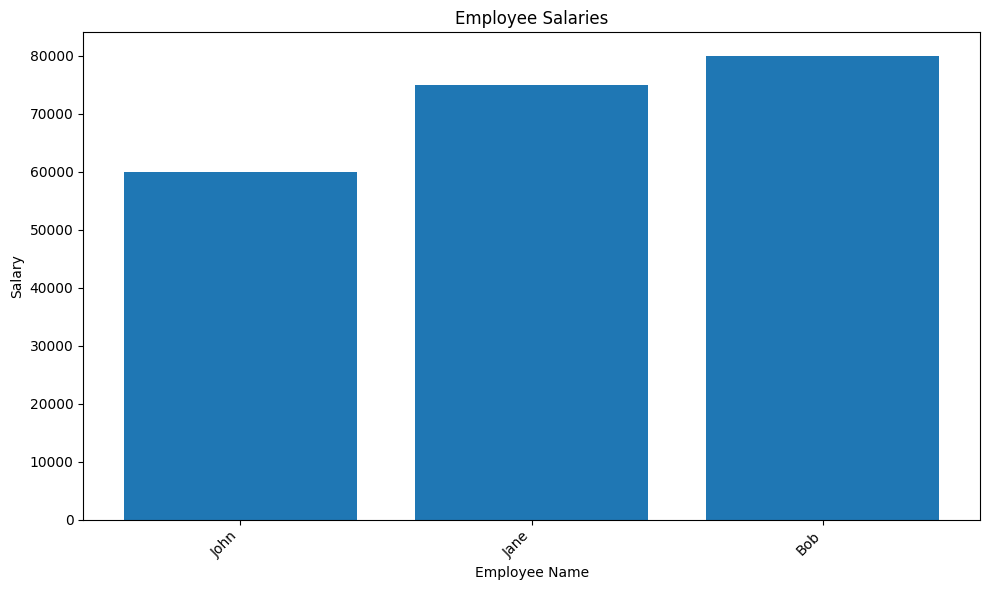

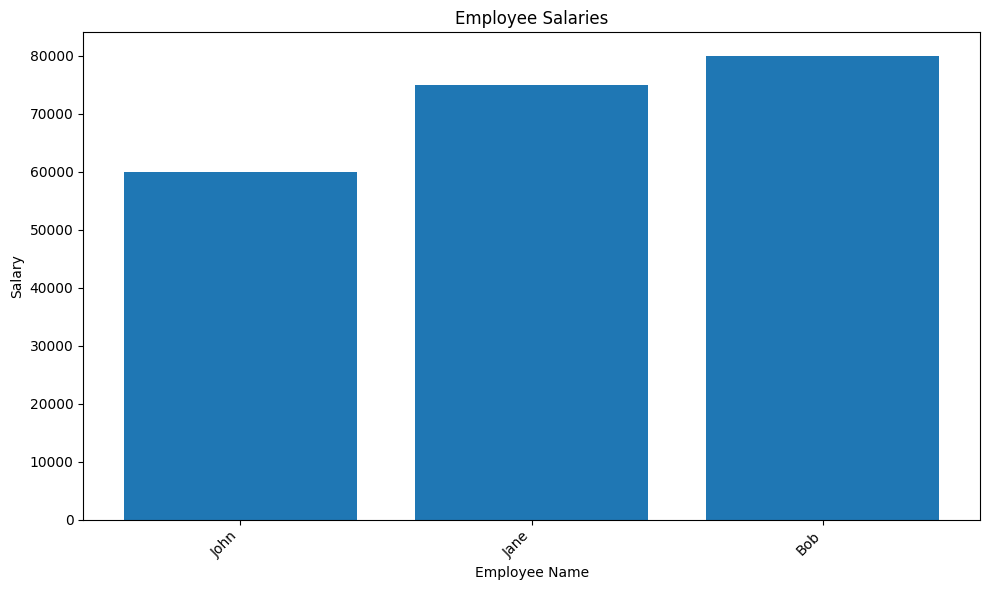

In [ ]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.bar(df['FirstName'], df['Salary'])
plt.title('Employee Salaries')
plt.xlabel('Employee Name')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize the data
plt.figure(figsize=(10, 6))
plt.bar(df['FirstName'], df['Salary'])
plt.title('Employee Salaries')
plt.xlabel('Employee Name')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()